In [ ]:
import re
import pandas as pd
import numpy as np
import nltk
import os
import argparse
import string
from tqdm import tqdm

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import TreebankWordTokenizer, PunktSentenceTokenizer, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.data import find
from spellchecker import SpellChecker
from sklearn.model_selection import cross_val_score



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB



from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


import torch

In [71]:
train_df = pd.read_csv('raw-dataset/train.csv')
test_df = pd.read_csv('raw-dataset/test.csv')

In [178]:
def clean_text(text):
    # Remove '\ufeff' if present
    text = text.replace('\ufeff', '')
    # Remove punctuation from the text
    text = text.translate(str.maketrans('', '', string.punctuation))

    # filter out stopwords
    words = text.split()
    stop_words = set(stopwords.words('english'))
    cleaned_words = [word for word in words if word.lower() not in stop_words]

    return ' '.join(cleaned_words)

def clean_text2(text):
    text = text.replace('www', ' www ')
    text = text.replace('https', ' https ')
    text = text.replace('  ', ' ')
    return text

def tokenize(text):
    sentence_tokenizer = TreebankWordTokenizer()
    lemmatizer = WordNetLemmatizer()
    tokenized_text = sentence_tokenizer.tokenize(text.lower())
    final = [lemmatizer.lemmatize(word) for word in tokenized_text]
    return final

def count_vect(text):
    return ' '.join(text)
    

train_df['cleaned_text'] = train_df['CONTENT'].apply(clean_text)
test_df['cleaned_text'] = test_df['CONTENT'].apply(clean_text)

train_df['cleaned_text'] = train_df['cleaned_text'].apply(clean_text2)
test_df['cleaned_text'] = test_df['cleaned_text'].apply(clean_text2)

train_df['tokenized_text'] = train_df['cleaned_text'].apply(tokenize)
test_df['tokenized_text'] = test_df['cleaned_text'].apply(tokenize)

train_df['count_vect'] = train_df['tokenized_text'].apply(count_vect)
test_df['count_vect'] = test_df['tokenized_text'].apply(count_vect)

train_df['DATE'] = train_df['DATE'].apply(lambda x: 1 if type(x) == float else 0)
test_df['DATE'] = test_df['DATE'].apply(lambda x: 1 if type(x) == float else 0)

In [180]:
test_df.iloc[100]['count_vect']

'please visit website oldchattk'

In [185]:
vectorizer = CountVectorizer()
vectorizer.fit(train_df['count_vect'])
vectorizer.fit(test_df['count_vect'])
X_train = vectorizer.transform(train_df['count_vect'])
X_test = vectorizer.transform(test_df['count_vect'])
y_train = train_df['CLASS']

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

sol = pd.read_csv("sample_submission.csv")
sol['CLASS'] = y_pred
sol.head()
sol.to_csv("nov_10_with_dom.csv", index=False)


In [ ]:
x_

In [ ]:
# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the tokenized text
x_1 = vectorizer.fit_transform(list(train_df['count_vect'])).toarray()
x_2 = np.array(train_df['DATE']).reshape(-1, 1)
x = np.hstack((x_1, x_2))
Y = train_df['CLASS']

In [158]:
x_train, x_test, y_train, y_test = train_test_split(x_1, Y, test_size=0.2, random_state=42)

lr_model = LogisticRegression(solver='liblinear')
lr_l1_model = LogisticRegression(penalty='l1', solver='liblinear')
bnb_model = BernoulliNB()
mnb_model = MultinomialNB()

lr_model.fit(x_train, y_train)
lr_l1_model.fit(x_train, y_train)
bnb_model.fit(x_train, y_train)
mnb_model.fit(x_train, y_train)

MultinomialNB()

In [159]:
lr_prediction = lr_model.predict(x_test)
lr_l1_prediction = lr_l1_model.predict(x_test)
bnb_prediction = bnb_model.predict(x_test)
mnb_prediction = mnb_model.predict(x_test)

# Calculate accuracy for each model
lr_accuracy = accuracy_score(y_test, lr_prediction)
lr_l1_accuracy = accuracy_score(y_test, lr_l1_prediction)
bnb_accuracy = accuracy_score(y_test, bnb_prediction)
mnb_accuracy = accuracy_score(y_test, mnb_prediction)

# Print the accuracy scores
print(f'Logistic Regression Accuracy: {lr_accuracy}')
print(f'Logistic Regression L1 Accuracy: {lr_l1_accuracy}')
print(f'Bernoulli Naive Bayes Accuracy: {bnb_accuracy}')
print(f'Multinomial Naive Bayes Accuracy: {mnb_accuracy}')

Logistic Regression Accuracy: 0.9379562043795621
Logistic Regression L1 Accuracy: 0.9416058394160584
Bernoulli Naive Bayes Accuracy: 0.8795620437956204
Multinomial Naive Bayes Accuracy: 0.8759124087591241


In [161]:
cv_lr = cross_val_score(lr_model, x_1, Y, cv=5)
cv_lr_l1 = cross_val_score(lr_l1_model, x_1, Y, cv=5)
cv_bnb = cross_val_score(bnb_model, x_1, Y, cv=5)
cv_mnb = cross_val_score(mnb_model, x_1, Y, cv=5)

print(f'Cross Validation Logistic Regression: {cv_lr.mean()}')
print(f'Cross Validation Logistic Regression L1: {cv_lr_l1.mean()}')
print(f'Cross Validation Bernoulli Naive Bayes: {cv_bnb.mean()}')
print(f'Cross Validation Multinomial Naive Bayes: {cv_mnb.mean()}')


Cross Validation Logistic Regression: 0.9255019919253495
Cross Validation Logistic Regression L1: 0.9298815539691452
Cross Validation Bernoulli Naive Bayes: 0.8583166225501992
Cross Validation Multinomial Naive Bayes: 0.8868051656372826


## WITH DATE INVOVLED

In [188]:
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

lr_model = LogisticRegression(solver='liblinear')
lr_l1_model = LogisticRegression(penalty='l1', solver='liblinear')
bnb_model = BernoulliNB()
mnb_model = MultinomialNB()
svm_model = SVC()

lr_model.fit(x_train, y_train)
lr_l1_model.fit(x_train, y_train)
bnb_model.fit(x_train, y_train)
mnb_model.fit(x_train, y_train)
svm_model.fit(x_train, y_train)

SVC()

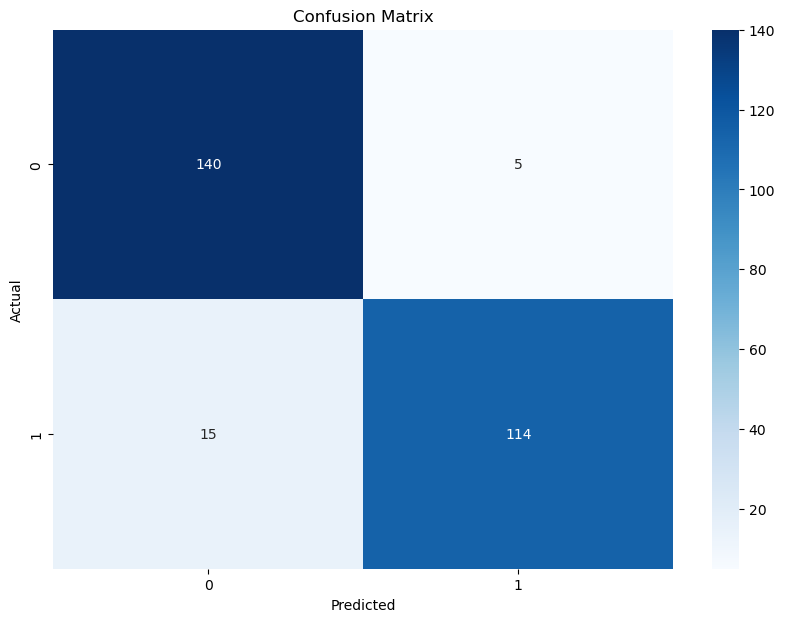

In [193]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

lr_prediction = lr_model.predict(x_test)
lr_l1_prediction = lr_l1_model.predict(x_test)
bnb_prediction = bnb_model.predict(x_test)
mnb_prediction = mnb_model.predict(x_test)
svm_prediction = svm_model.predict(x_test)

# Calculate accuracy for each model
lr_accuracy = accuracy_score(y_test, lr_prediction)
lr_l1_accuracy = accuracy_score(y_test, lr_l1_prediction)
bnb_accuracy = accuracy_score(y_test, bnb_prediction)
mnb_accuracy = accuracy_score(y_test, mnb_prediction)
svm_accuracy = accuracy_score(y_test, svm_prediction)


# Print the accuracy scores
cm = confusion_matrix(y_test, lr_prediction)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [202]:
incorrect_indices = np.where(y_test != lr_prediction)[0]
incorrect_indices

incorrect_indices

array([ 14,  43,  55,  56,  80,  85,  89, 110, 118, 134, 139, 141, 159,
       163, 170, 197, 206, 209, 246, 268])

## CV

In [172]:
cv_lr = cross_val_score(lr_model, x, Y, cv=5)
cv_lr_l1 = cross_val_score(lr_l1_model, x, Y, cv=5)
cv_bnb = cross_val_score(bnb_model, x, Y, cv=5)
cv_mnb = cross_val_score(mnb_model, x, Y, cv=5)
cv_svm = cross_val_score(svm_model, x, Y, cv=5)

print(f'Cross Validation Logistic Regression: {cv_lr.mean()}')
print(f'Cross Validation Logistic Regression L1: {cv_lr_l1.mean()}')
print(f'Cross Validation Bernoulli Naive Bayes: {cv_bnb.mean()}')
print(f'Cross Validation Multinomial Naive Bayes: {cv_mnb.mean()}')
print(f'Cross Validation Support Vector Machine: {cv_svm.mean()}')


Cross Validation Logistic Regression: 0.9182107430282613
Cross Validation Logistic Regression L1: 0.8992085773107672
Cross Validation Bernoulli Naive Bayes: 0.8583166225501992
Cross Validation Multinomial Naive Bayes: 0.8926499291462795
Cross Validation Support Vector Machine: 0.9174727948450576


## TF-IDF

In [173]:
tf_vectorizer = TfidfVectorizer()

x_1 = tf_vectorizer.fit_transform(list(train_df['count_vect'])).toarray()
x_2 = np.array(train_df['DATE']).reshape(-1, 1)
x = np.hstack((x_1, x_2))
Y = train_df['CLASS']

In [174]:
x_train, x_test, y_train, y_test = train_test_split(x_1, Y, test_size=0.2, random_state=42)

lr_model = LogisticRegression(solver='liblinear')
lr_l1_model = LogisticRegression(penalty='l1', solver='liblinear')
bnb_model = BernoulliNB()
mnb_model = MultinomialNB()
svm_model = SVC()

lr_model.fit(x_train, y_train)
lr_l1_model.fit(x_train, y_train)
bnb_model.fit(x_train, y_train)
mnb_model.fit(x_train, y_train)
svm_model.fit(x_train, y_train)

SVC()

In [175]:
lr_prediction = lr_model.predict(x_test)
lr_l1_prediction = lr_l1_model.predict(x_test)
bnb_prediction = bnb_model.predict(x_test)
mnb_prediction = mnb_model.predict(x_test)
svm_prediction = svm_model.predict(x_test)

# Calculate accuracy for each model
lr_accuracy = accuracy_score(y_test, lr_prediction)
lr_l1_accuracy = accuracy_score(y_test, lr_l1_prediction)
bnb_accuracy = accuracy_score(y_test, bnb_prediction)
mnb_accuracy = accuracy_score(y_test, mnb_prediction)
svm_accuracy = accuracy_score(y_test, svm_prediction)

# Print the accuracy scores
print(f'Logistic Regression Accuracy: {lr_accuracy}')
print(f'Logistic Regression L1 Accuracy: {lr_l1_accuracy}')
print(f'Bernoulli Naive Bayes Accuracy: {bnb_accuracy}')
print(f'Multinomial Naive Bayes Accuracy: {mnb_accuracy}')
print(f'Support Vector Machine Accuracy: {svm_accuracy}')


cv_lr = cross_val_score(lr_model, x, Y, cv=5)
cv_lr_l1 = cross_val_score(lr_l1_model, x, Y, cv=5)
cv_bnb = cross_val_score(bnb_model, x, Y, cv=5)
cv_mnb = cross_val_score(mnb_model, x, Y, cv=5)
cv_svm = cross_val_score(svm_model, x, Y, cv=5)

print(f'Cross Validation Logistic Regression: {cv_lr.mean()}')
print(f'Cross Validation Logistic Regression L1: {cv_lr_l1.mean()}')
print(f'Cross Validation Bernoulli Naive Bayes: {cv_bnb.mean()}')
print(f'Cross Validation Multinomial Naive Bayes: {cv_mnb.mean()}')
print(f'Cross Validation Support Vector Machine: {cv_svm.mean()}')


Logistic Regression Accuracy: 0.927007299270073
Logistic Regression L1 Accuracy: 0.9014598540145985
Bernoulli Naive Bayes Accuracy: 0.8795620437956204
Multinomial Naive Bayes Accuracy: 0.9014598540145985
Support Vector Machine Accuracy: 0.9197080291970803
Cross Validation Logistic Regression: 0.9182107430282613
Cross Validation Logistic Regression L1: 0.8992085773107672
Cross Validation Bernoulli Naive Bayes: 0.8583166225501992
Cross Validation Multinomial Naive Bayes: 0.8926499291462795
Cross Validation Support Vector Machine: 0.9174727948450576


1. check what comments are inaccurate
2. check if we can alter the threshold to reduce the FPR/FNR
3. choose between TF-IDF and CountVectorizer
4. we need justification for:
- why we chose TF-IDF/CountVector
    - idk
- why we chose X model over others
    - separability
- how we hyperparamatized X model (change threshold, etc.)
    - based on FPR/FNR
